# *Introduction* 

* *On this chapter ,we will use R-Programming Language in order to conduct descriptive and inferential analysis to analyse the Prices of Bell Peppers of different colors (green, red, yellow) to help decision making*


---
---

*A. Install needed libraries*

In [ ]:
library(tidyverse)
library(janitor)
library(ggplot2)
library(patchwork)
library(mosaic)
library(skimr)
library(GGally)
library(dlookr)
library(rstatix)
library(ggstatsplot)
library(effectsize)
library(gmodels)
library(FSA)
library(ISLR)
library(repr)
library(knitr)
library(gridExtra)
library(corrplot)
library(DataExplorer)
library(glue)
options(repr.plot.width=25, repr.plot.height=7);

---
---

*B. Data Set*

In [3]:
df<- read.csv("C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Siteck_ML/Pepper _Price_Analysis/Data_Sets/data_set_for_stats.csv")

In [4]:
df %>% head()

,week_start_dt,week_end_dt,vietnam_season,p_color,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,china_season,jordan_max_price,jordan_min_price,demand,supply
,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015-12-28,2016-01-03,2,green,6.599075,1596040,10793.5,65658.1,1519589,0,0,False,False,False,False,6.625,6.325,0.50,0.1650
2,2015-12-28,2016-01-03,2,red,7.175335,1596040,10793.5,65658.1,1519589,0,0,False,False,False,False,7.525,7.125,0.51,0.1683
3,2015-12-28,2016-01-03,2,yellow,7.300575,1596040,10793.5,65658.1,1519589,0,0,False,False,False,False,7.425,7.025,16.55,5.4615
4,2016-01-04,2016-01-10,2,yellow,7.379675,2295578,5677.8,15274.4,2274626,0,0,False,False,False,False,7.525,7.025,271.16,89.4828
5,2016-01-04,2016-01-10,2,red,7.175335,2295578,5677.8,15274.4,2274626,0,0,False,False,False,False,7.625,7.125,42.33,13.9689
6,2016-01-04,2016-01-10,2,green,6.599075,2295578,5677.8,15274.4,2274626,0,0,False,False,False,False,6.625,6.325,0.58,0.1914


---

*B.1. data set dimensions*

In [5]:
df %>% dim() 

[1] 1215   19

*B.2. Na Values*

In [6]:
df  %>% is.na() %>% sum()

[1] 0

---

*B.3. Data types and some details using glimps function*

In [7]:
df %>% glimpse()

Rows: 1,215
Columns: 19
$ week_start_dt    <chr> "2015-12-28", "2015-12-28", "2015-12-28", "2016-01-04…
$ week_end_dt      <chr> "2016-01-03", "2016-01-03", "2016-01-03", "2016-01-10…
$ vietnam_season   <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ p_color          <chr> "green", "red", "yellow", "yellow", "red", "green", "…
$ price            <dbl> 6.599075, 7.175335, 7.300575, 7.379675, 7.175335, 6.5…
$ total_volume     <dbl> 1596040, 1596040, 1596040, 2295578, 2295578, 2295578,…
$ brazil           <dbl> 10793.5, 10793.5, 10793.5, 5677.8, 5677.8, 5677.8, 26…
$ india            <dbl> 65658.1, 65658.1, 65658.1, 15274.4, 15274.4, 15274.4,…
$ vietnam          <dbl> 1519589, 1519589, 1519589, 2274626, 2274626, 2274626,…
$ indonesia        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ china            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ brazil_season    <chr> "False", "False", "False", "False", "False", "False",…
$ indonesia_seas

---

*B.4. converting (week_start_dt,week_end_dt) to date factors,converting (vietnam_season,p_color,brazil_season,
,india_season,china_season) to factors*

In [8]:
df$week_start_dt<-as.Date.factor(df$week_start_dt);
df$week_end_dt<-as.Date.factor(df$week_end_dt)

In [9]:
df[sapply(df, is.character)] <- lapply(df[sapply(df, is.character)], as.factor)
df$vietnam_season<-as.factor(df$vietnam_season)

---
---

*Define categorical variables* 

In [10]:
categorical_data<-df %>% select_if(is.factor)
categorical_data %>% colnames()

[1] "vietnam_season"   "p_color"          "brazil_season"    "indonesia_season"
[5] "india_season"     "china_season"

*Define numerical variables* 

In [11]:
numerical_data<-df %>% select_if(is.numeric) 
numerical_data %>% colnames()

[1] "price"            "total_volume"     "brazil"           "india"           
 [5] "vietnam"          "indonesia"        "china"            "jordan_max_price"
 [9] "jordan_min_price" "demand"           "supply"

---

*C. Analysis*

*Categorical variables EDA*

* *Categorical variables distribution*

In [12]:
categorical_data %>% summary() %>% kable()



|   |vietnam_season |  p_color  |brazil_season |indonesia_season |india_season |china_season |
|:--|:--------------|:----------|:-------------|:----------------|:------------|:------------|
|   |1:414          |green :405 |False:690     |False:903        |False:912    |False:801    |
|   |2:486          |red   :405 |True :525     |True :312        |True :303    |True :414    |
|   |3:315          |yellow:405 |NA            |NA               |NA           |NA           |

* *Categorical variables Visualization*

In [13]:
my_thems=theme(text = element_text(size = 30),
      plot.subtitle = element_text(size = 30),
      legend.title = element_text(size = 30),
      legend.text = element_text(size = 30),
      axis.text.x = element_text(size = 30)
      )
count_label<-geom_text(aes(label = ..count..), stat = "count", vjust = 1.5, colour = "black",size=10)

In [14]:
categorical_data_vizualization <- function(variable_name) {
    viz<-ggplot(categorical_data,aes(x =variable_name,fill=variable_name))+geom_bar(show.legend = FALSE)+count_label+my_thems
    return(viz)
}

Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead."


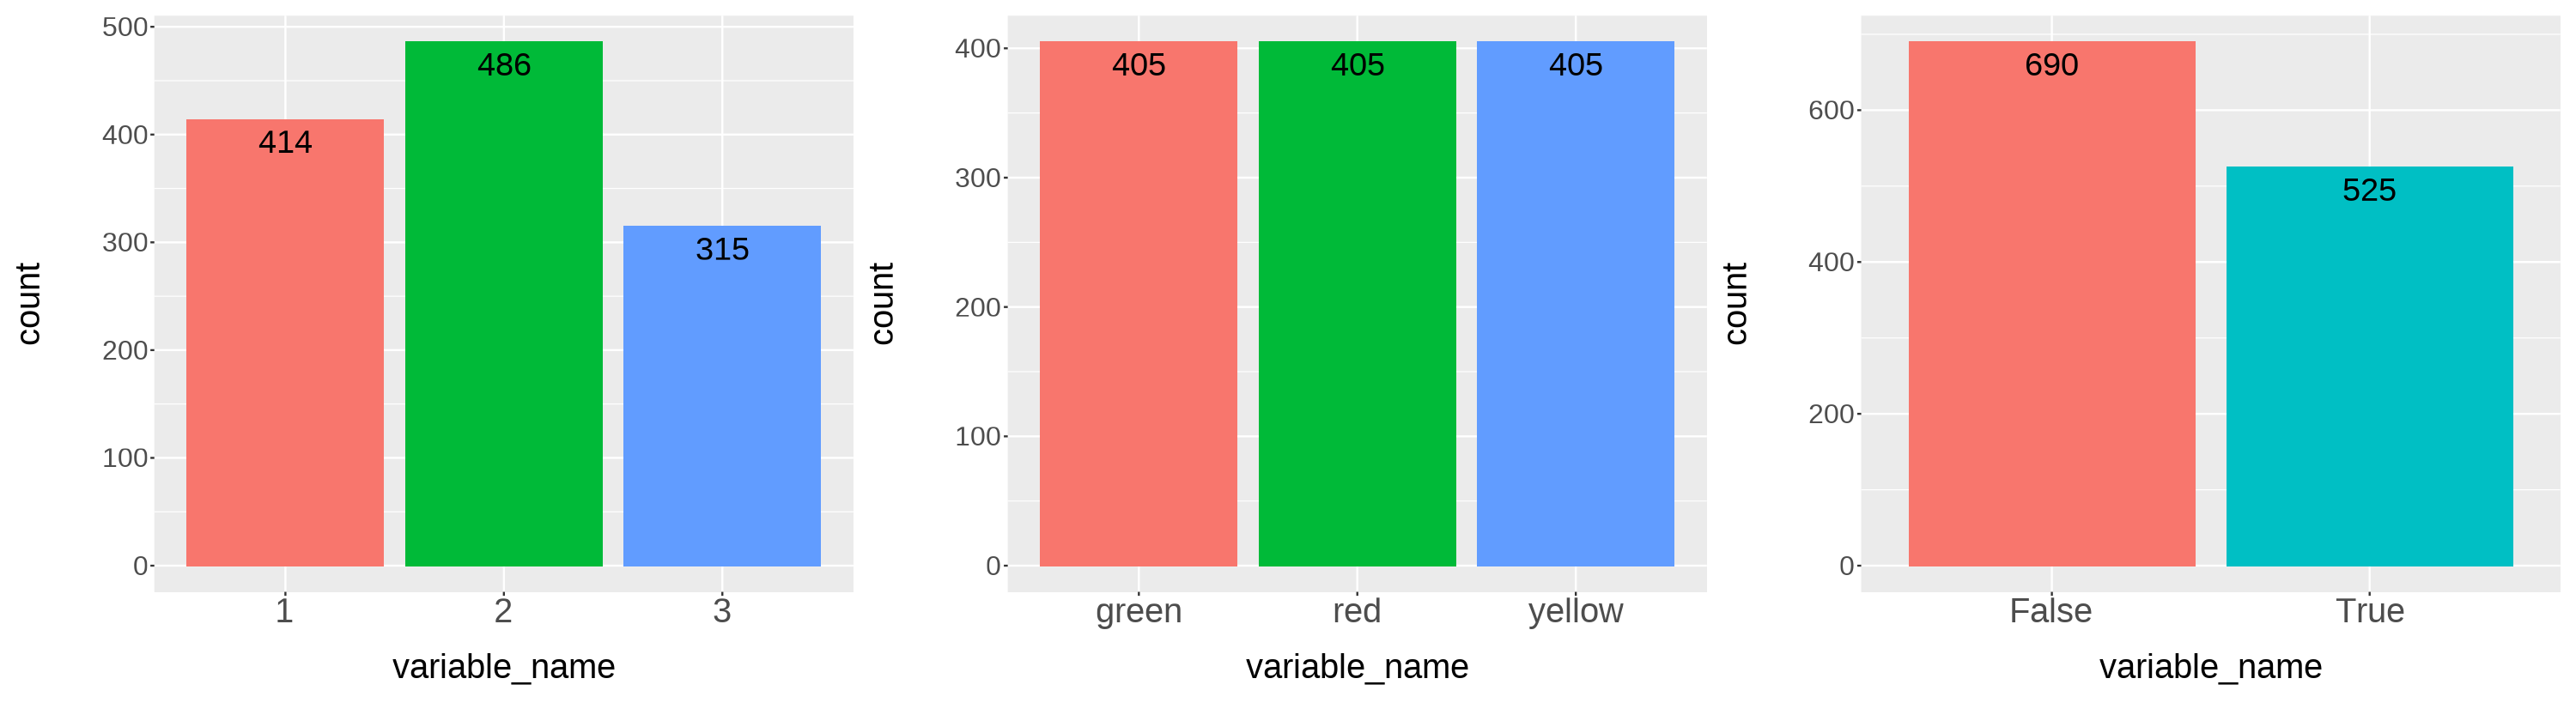

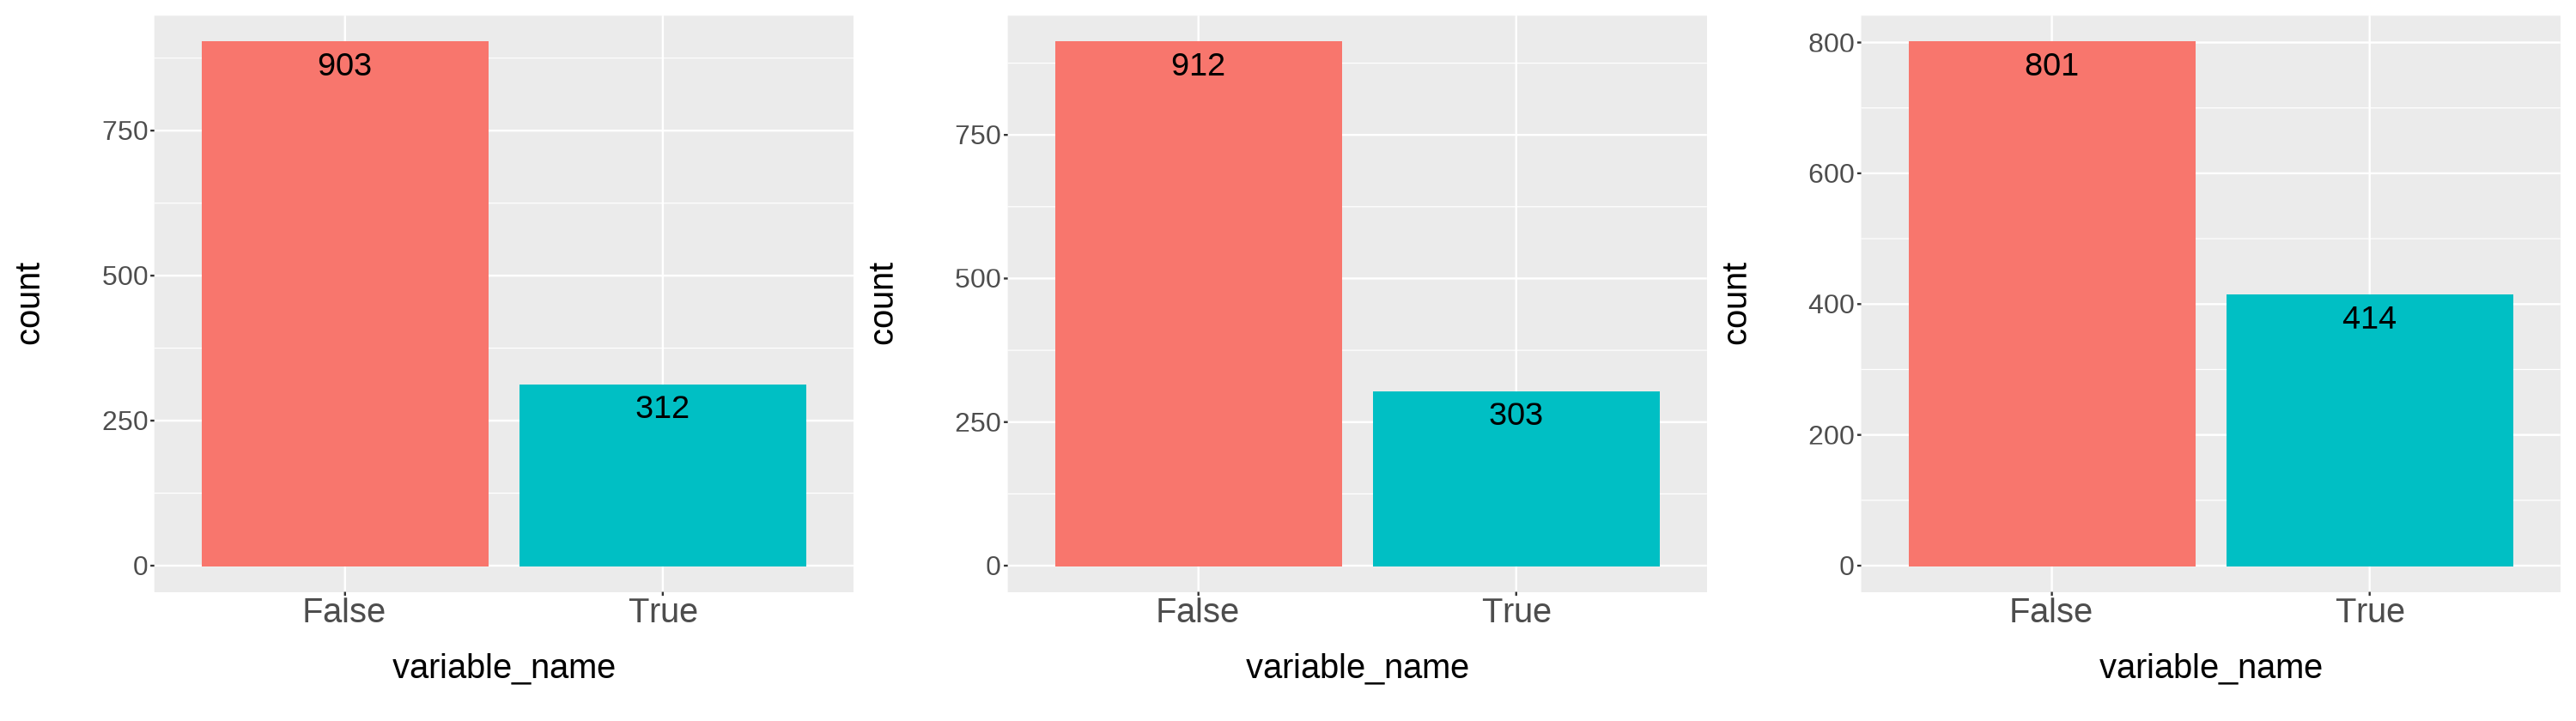

In [15]:
options(repr.plot.width=25, repr.plot.height=7);
categorical_data_vizualization(categorical_data$vietnam_season)+categorical_data_vizualization(categorical_data$p_color)+
categorical_data_vizualization(categorical_data$brazil_season)
categorical_data_vizualization(categorical_data$indonesia_season)+categorical_data_vizualization(categorical_data$india_season)+categorical_data_vizualization(categorical_data$china_season)  

 *Numerical variables EDA*

* *numerical variables distribution*

In [16]:
numerical_data %>% summary()

     price         total_volume         brazil           india       
 Min.   : 6.300   Min.   : 325471   Min.   :     0   Min.   :     0  
 1st Qu.: 7.000   1st Qu.:1938246   1st Qu.: 10609   1st Qu.:     0  
 Median : 7.600   Median :2254902   Median :175493   Median :     0  
 Mean   : 8.009   Mean   :2244701   Mean   :245303   Mean   : 28744  
 3rd Qu.: 8.601   3rd Qu.:2541123   3rd Qu.:443551   3rd Qu.: 31023  
 Max.   :14.085   Max.   :3555979   Max.   :877648   Max.   :348997  
    vietnam          indonesia           china        jordan_max_price
 Min.   : 220122   Min.   :      0   Min.   :     0   Min.   : 6.225  
 1st Qu.:1402234   1st Qu.:      0   1st Qu.:     0   1st Qu.: 7.425  
 Median :1785219   Median :   2150   Median :     0   Median : 8.025  
 Mean   :1806530   Mean   : 154948   Mean   :  8488   Mean   : 8.509  
 3rd Qu.:2204095   3rd Qu.: 278469   3rd Qu.:  7257   3rd Qu.: 9.225  
 Max.   :3549175   Max.   :1061051   Max.   :210920   Max.   :14.225  
 jordan_min_p

 * *Numerical variables distribution*

In [218]:
numerical_data_vizualization <- function(variable_name) {
    viz<-ggplot(numerical_data, aes(x = variable_name,y=after_stat(density))) + geom_histogram(fill = 'blue', color = 'black',alpha=.5) +
    labs(x="",y="")+geom_density(color = "green", linewidth = 1)+my_thems
    return(viz)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


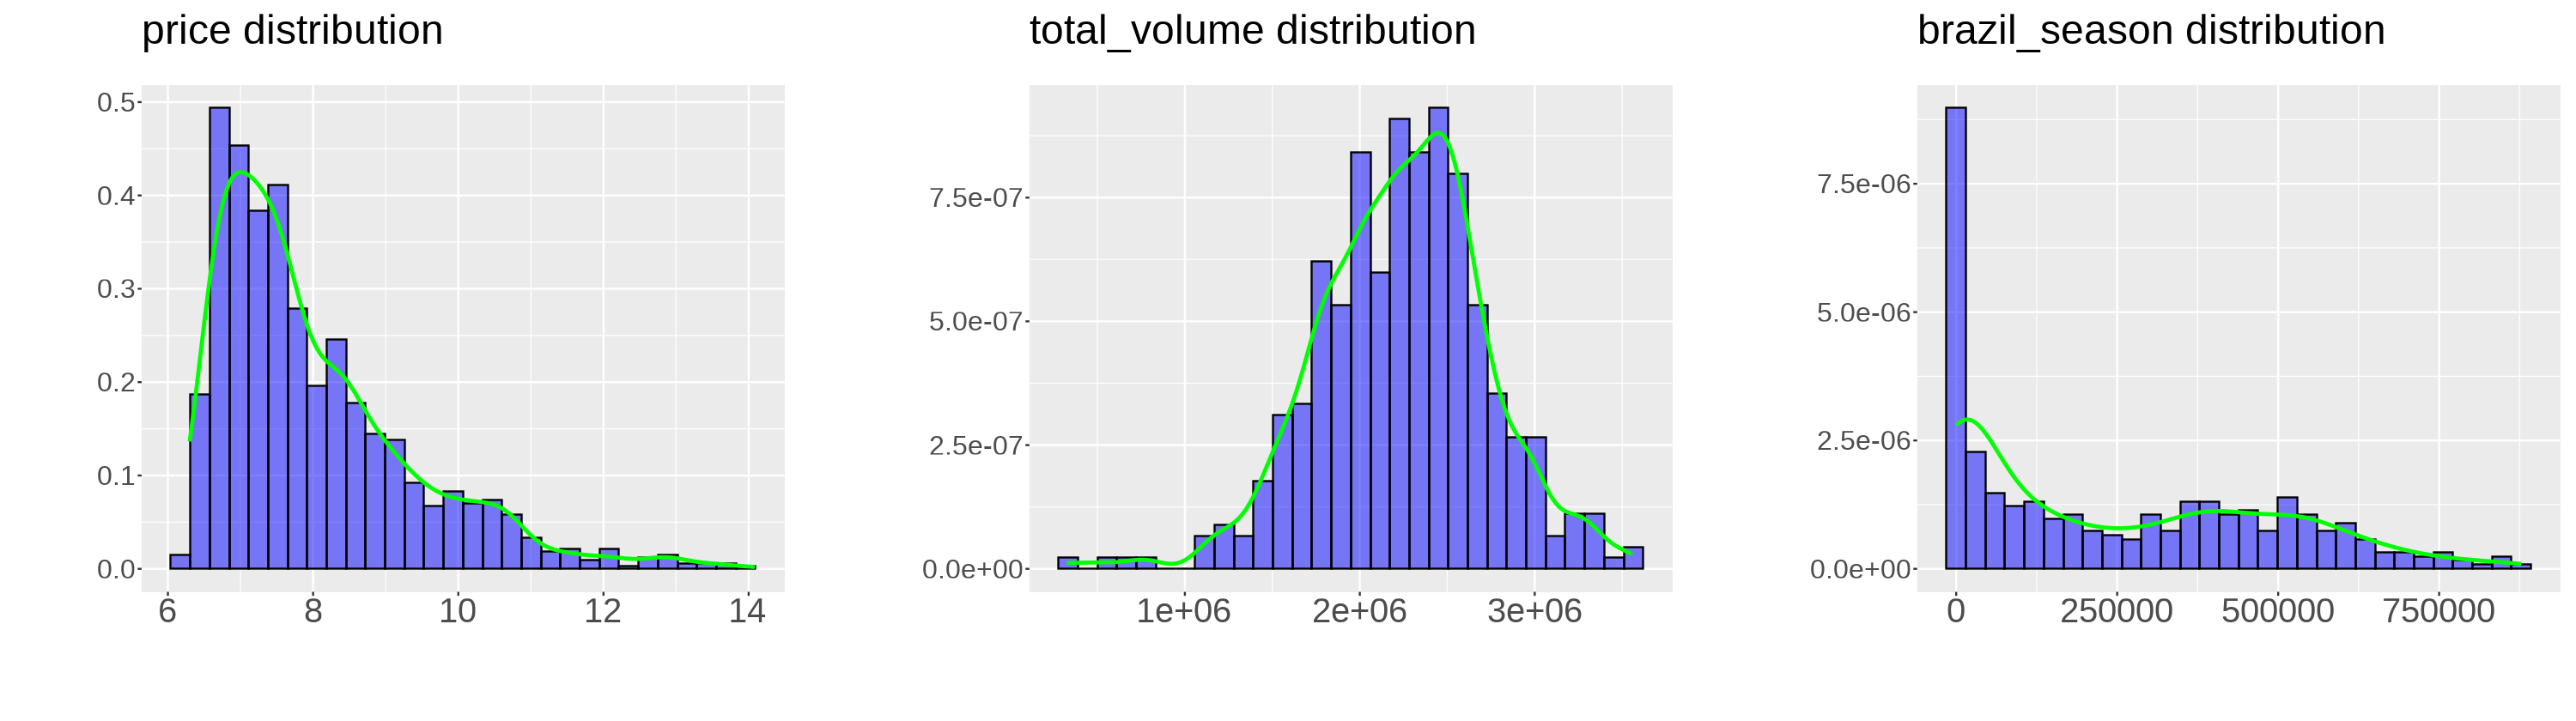

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


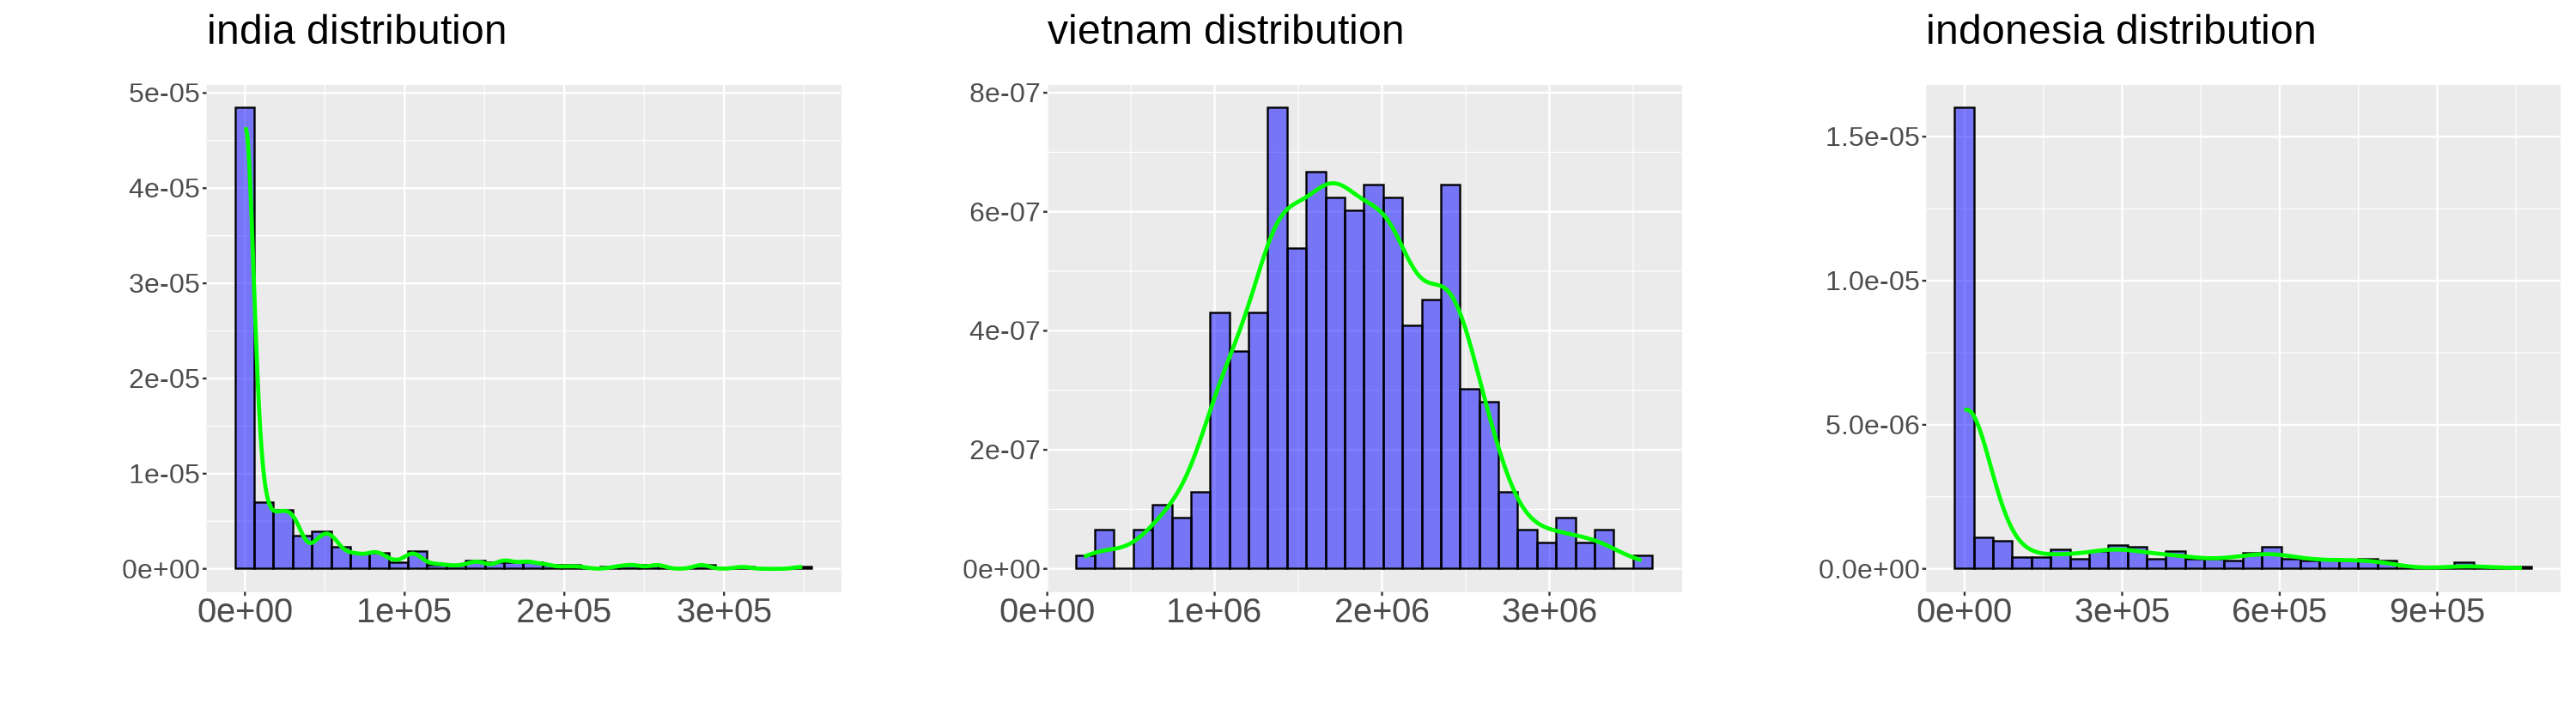

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


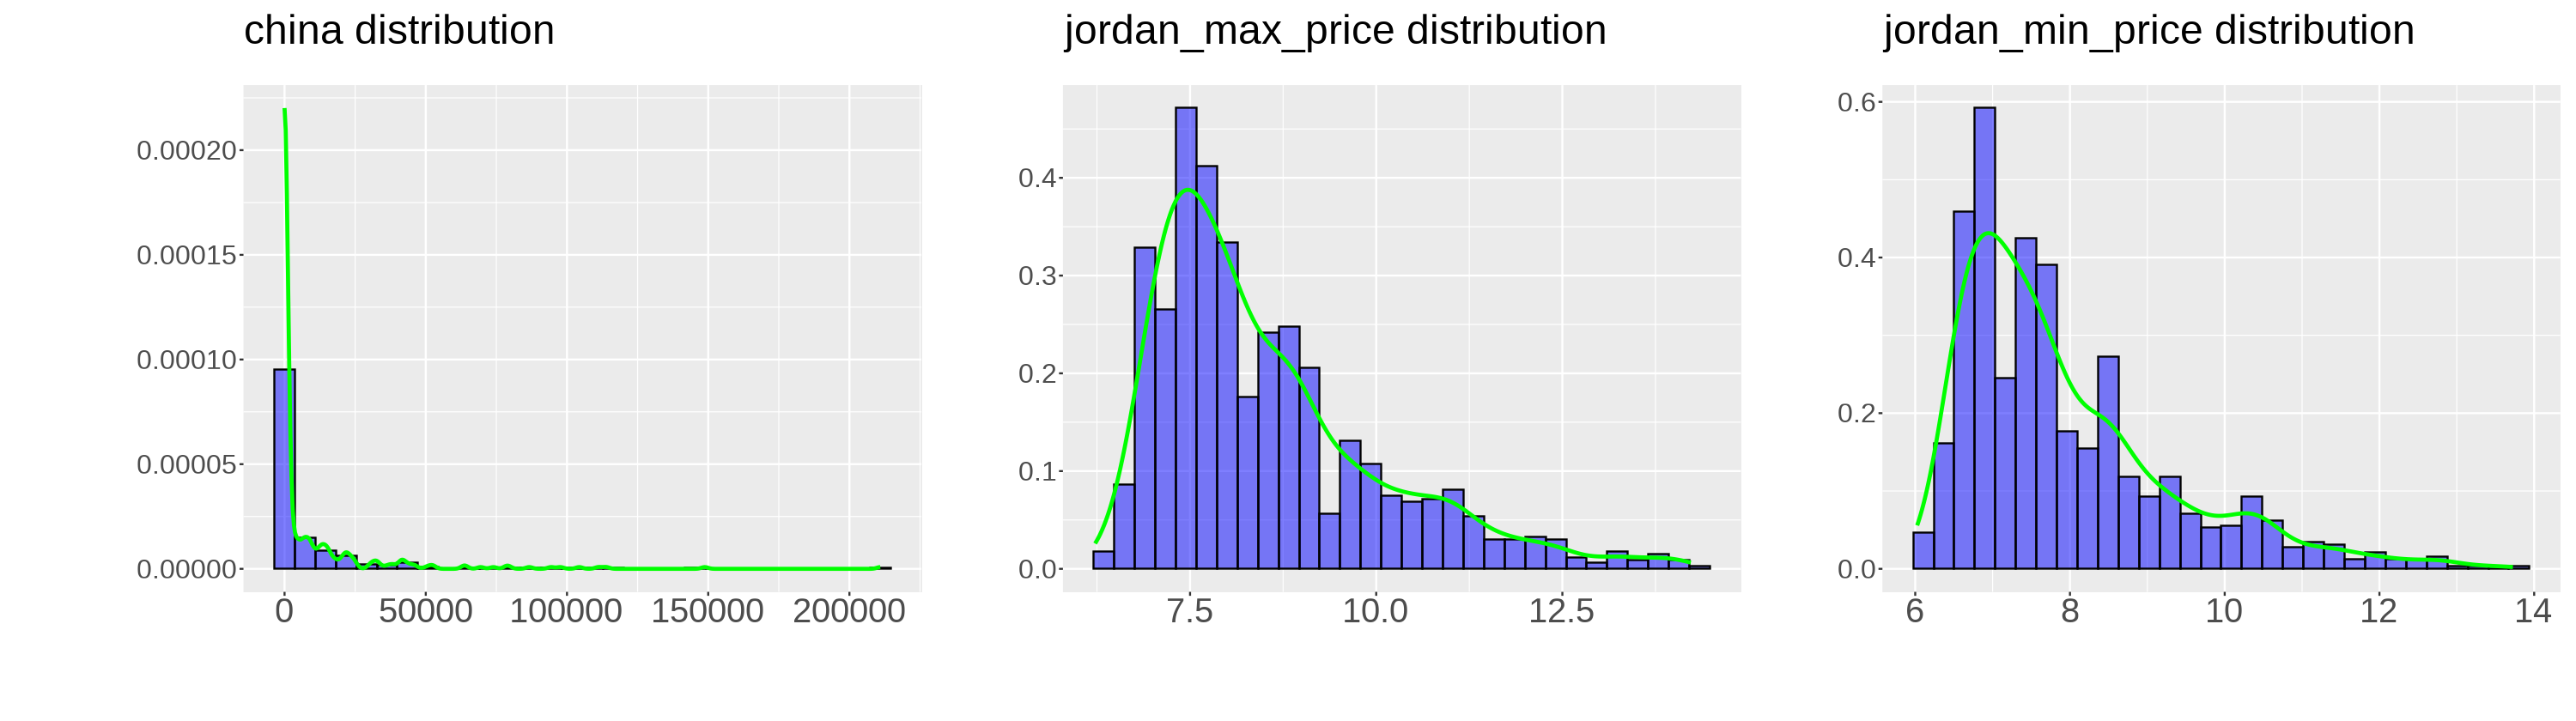

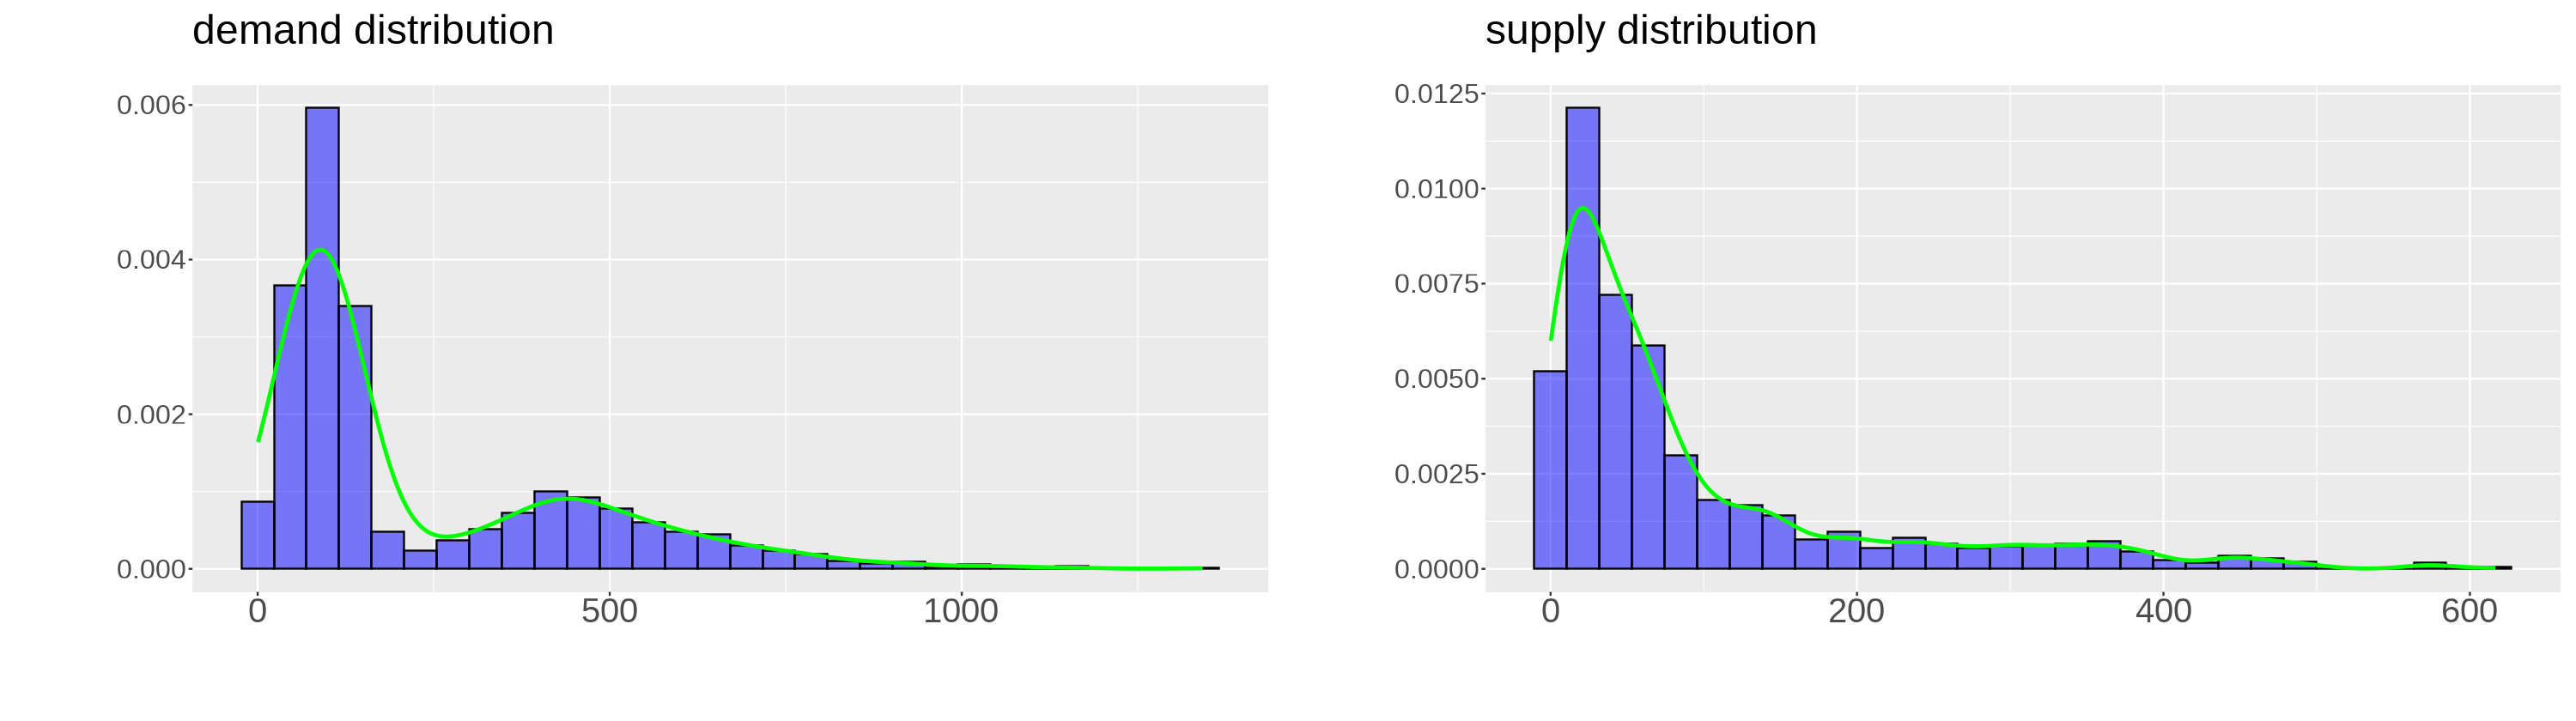

In [219]:
options(repr.plot.width=25, repr.plot.height=7);
numerical_data_vizualization(numerical_data$price)+ggtitle("price distribution")+
numerical_data_vizualization(numerical_data$total_volume)+ggtitle("total_volume distribution")+
numerical_data_vizualization(numerical_data$brazil)+ggtitle("brazil_season distribution")

numerical_data_vizualization(numerical_data$india)+ggtitle("india distribution")+
numerical_data_vizualization(numerical_data$vietnam)+ggtitle("vietnam distribution")+
numerical_data_vizualization(numerical_data$indonesia)+ggtitle("indonesia distribution")

numerical_data_vizualization(numerical_data$china)+ggtitle("china distribution")+
numerical_data_vizualization(numerical_data$jordan_max_price)+ggtitle("jordan_max_price distribution")+
numerical_data_vizualization(numerical_data$jordan_min_price)+ggtitle("jordan_min_price distribution")

numerical_data_vizualization(numerical_data$demand)+ggtitle("demand distribution")+
numerical_data_vizualization(numerical_data$supply)+ggtitle("supply distribution")


---

*Visualizing The Relation between The numerical variables :*

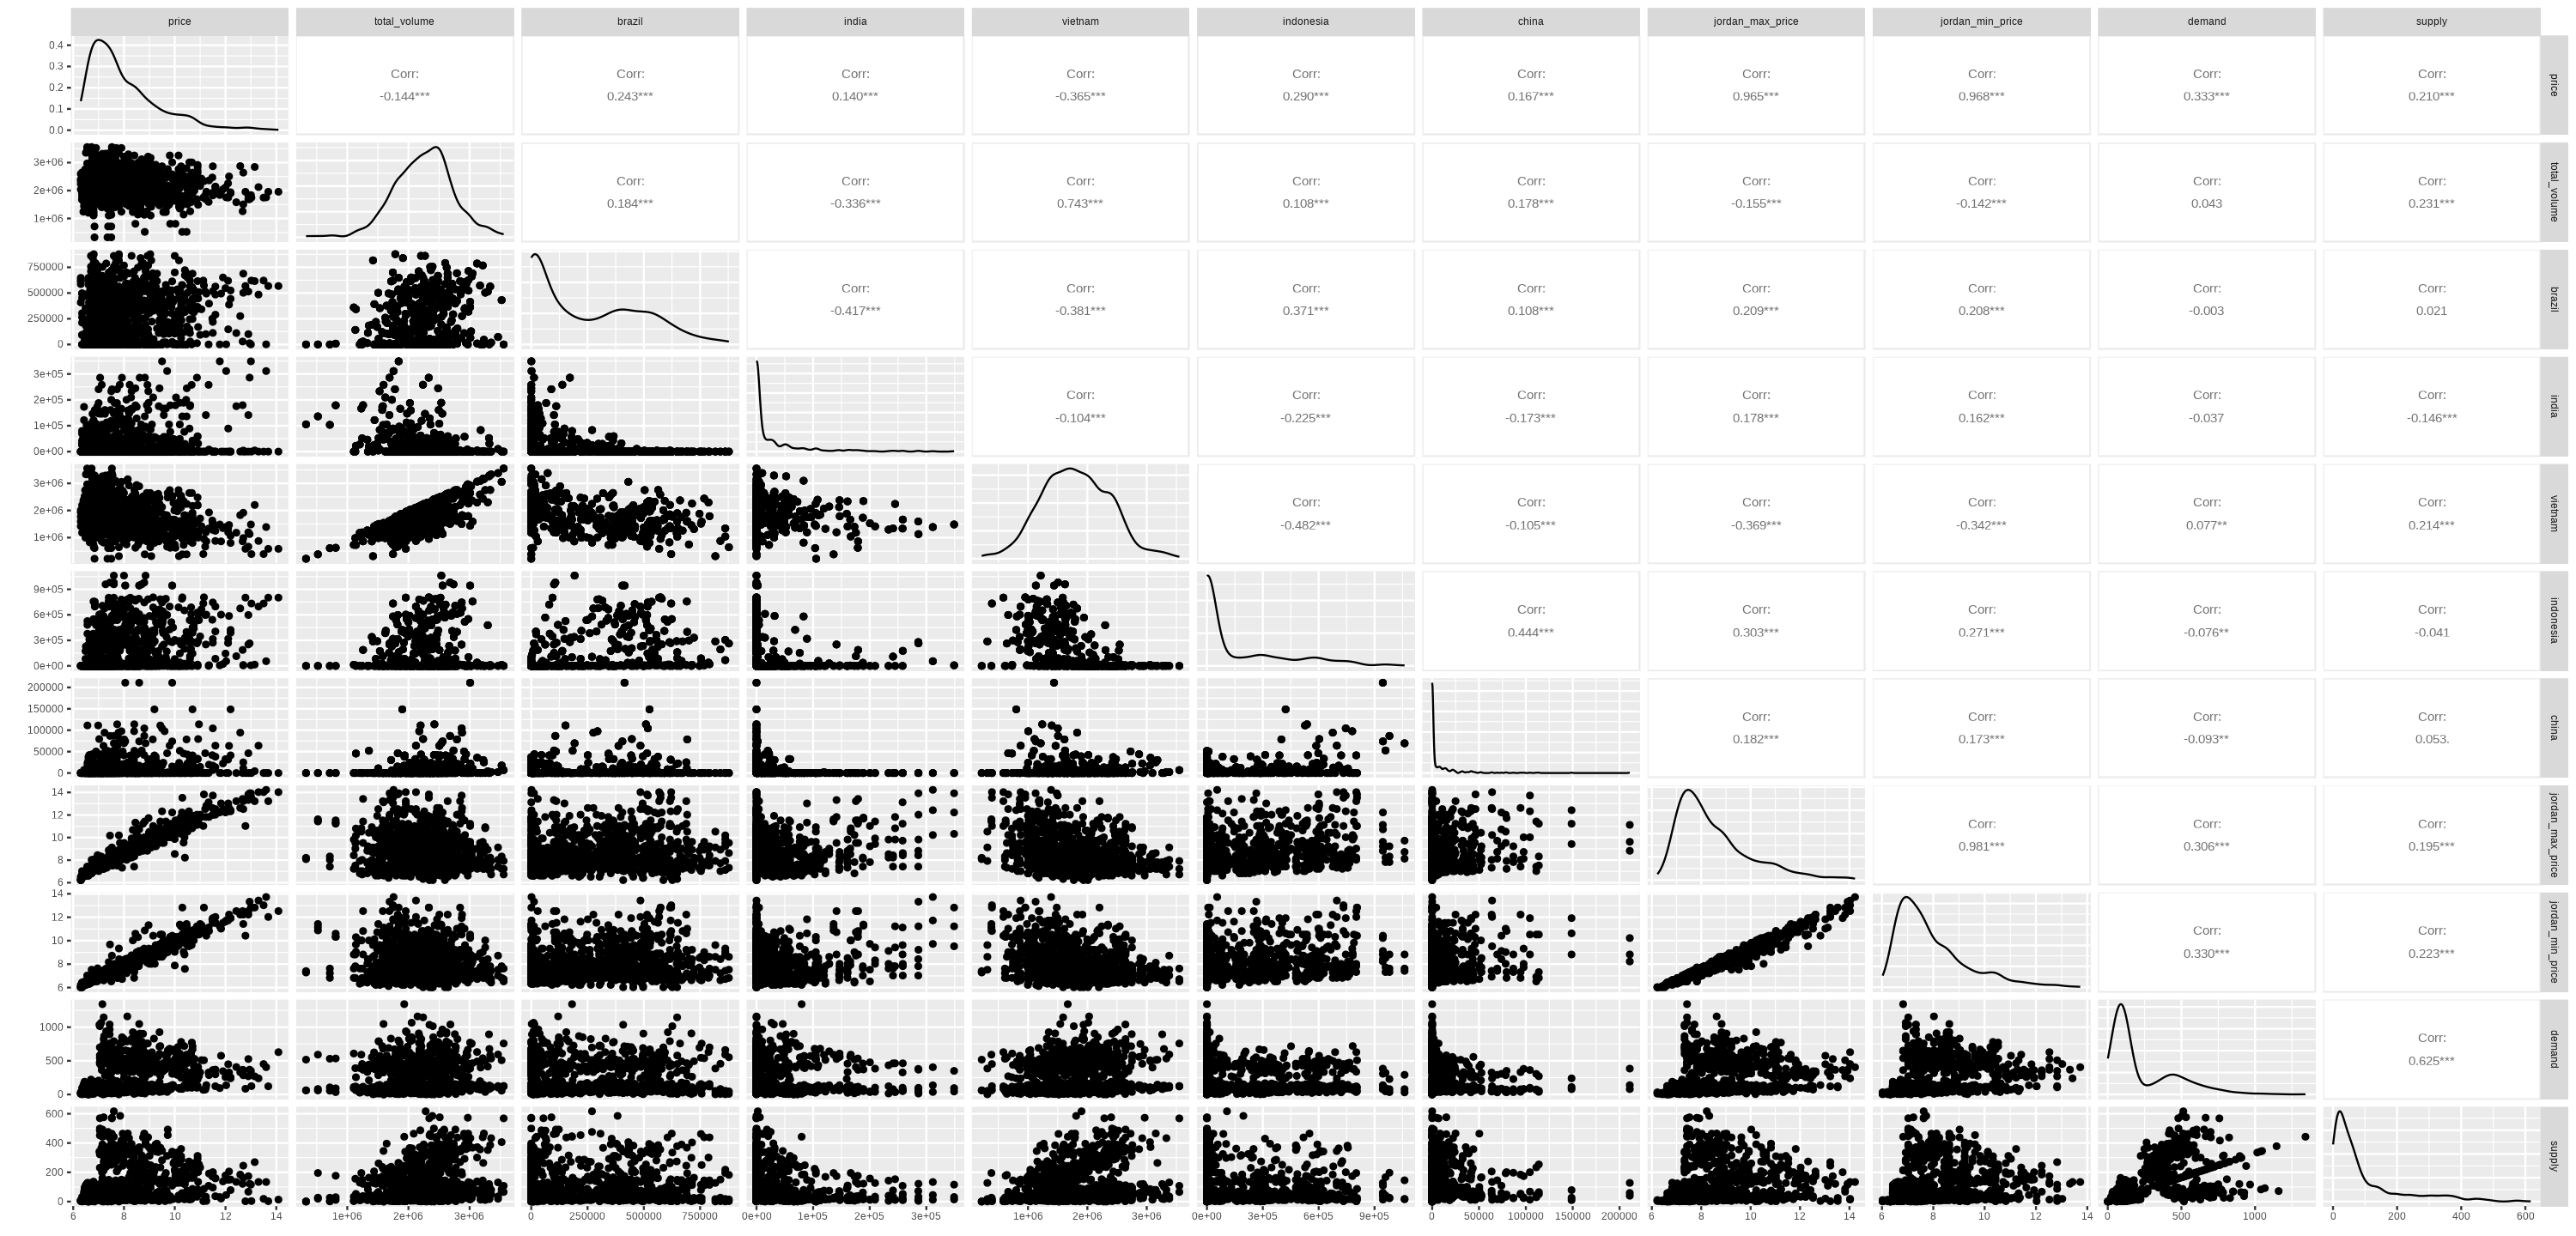

In [207]:
options(repr.plot.width=25, repr.plot.height=12);
ggpairs(numerical_data)

* *Visualizing The Relation between The Price variable and other numerical variables :*

In [216]:
Relation_between_Price_vs_others_vizualization <- function(variable_name) {
    viz<-ggplot(numerical_data, aes(x = variable_name, y = price)) + geom_point() +geom_smooth()+my_thems
    return(viz)
}

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


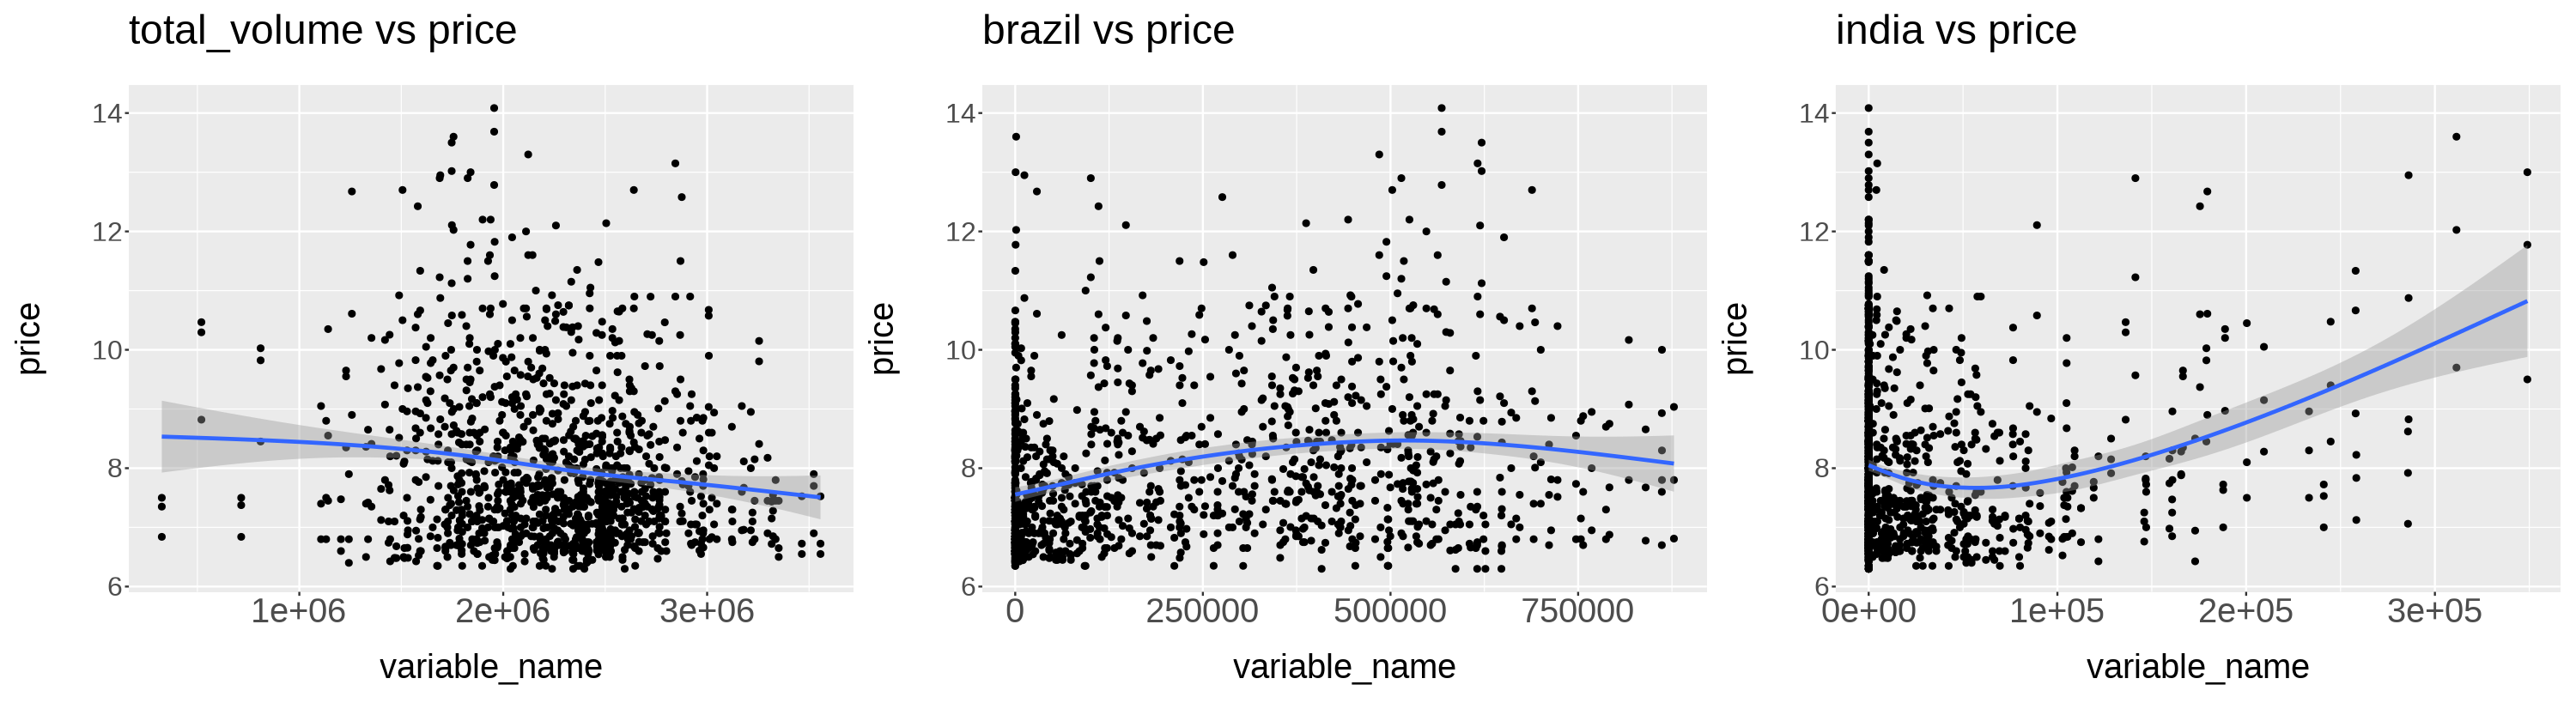

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


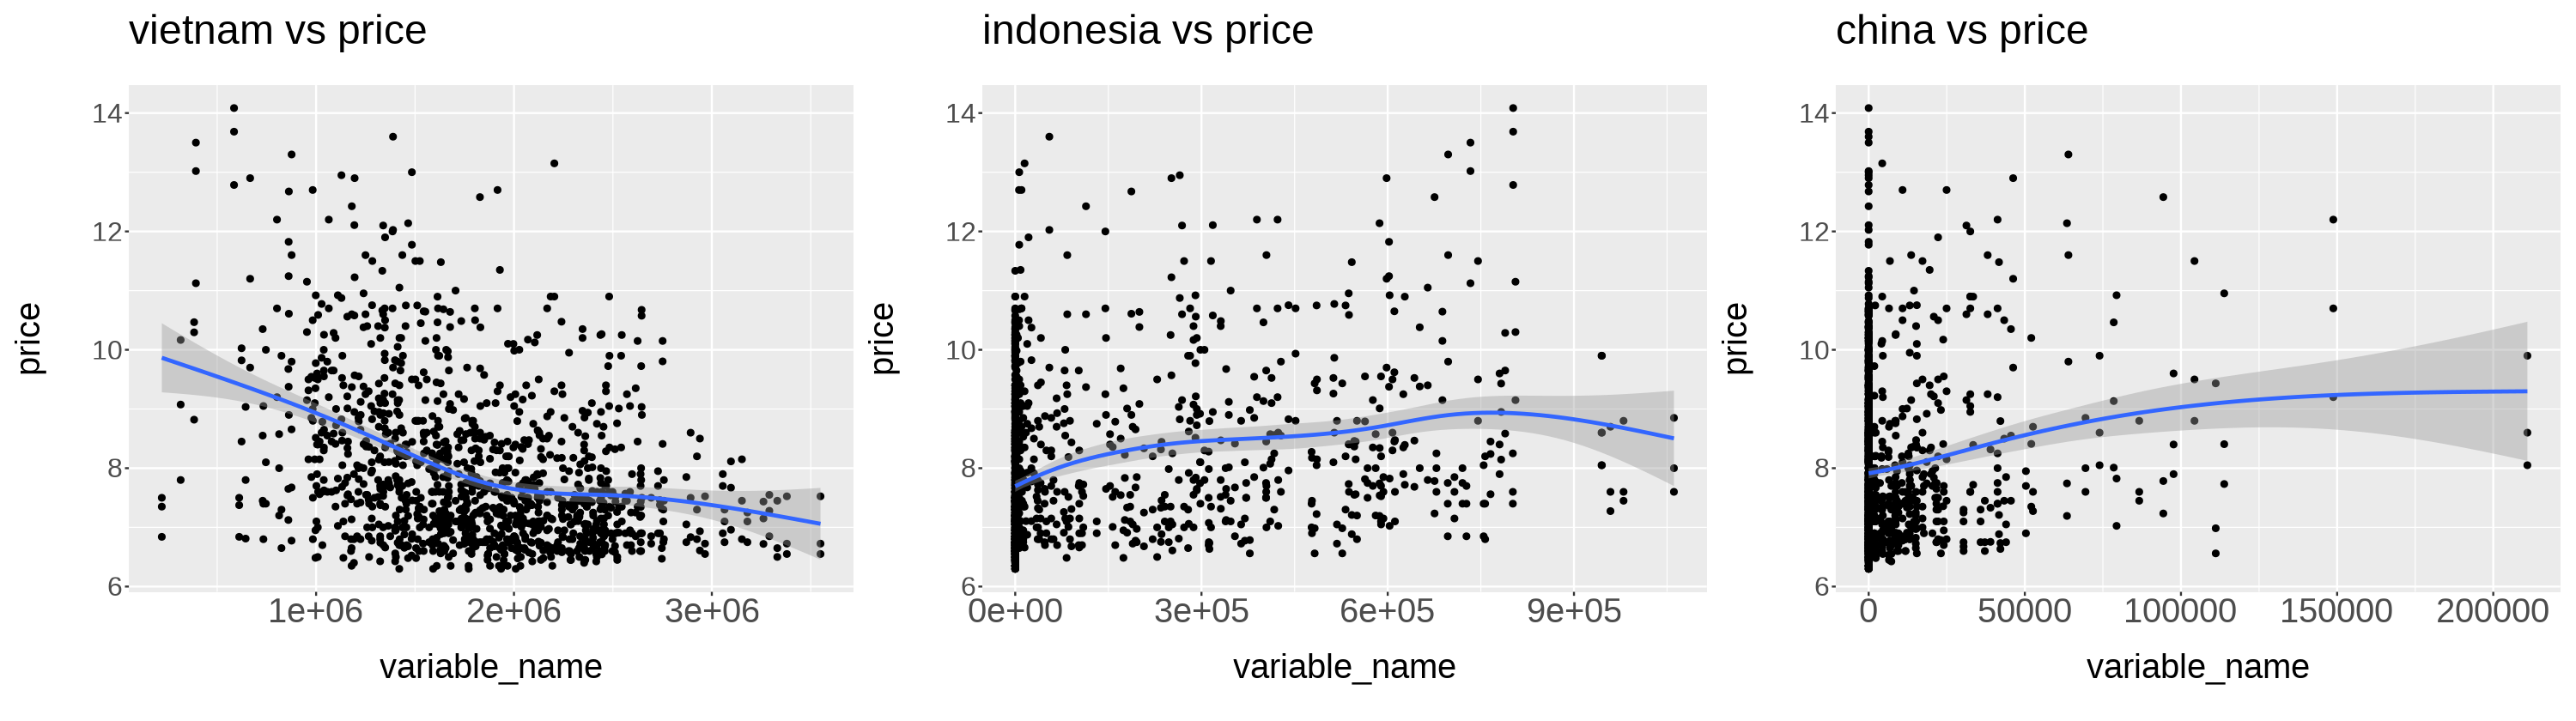

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


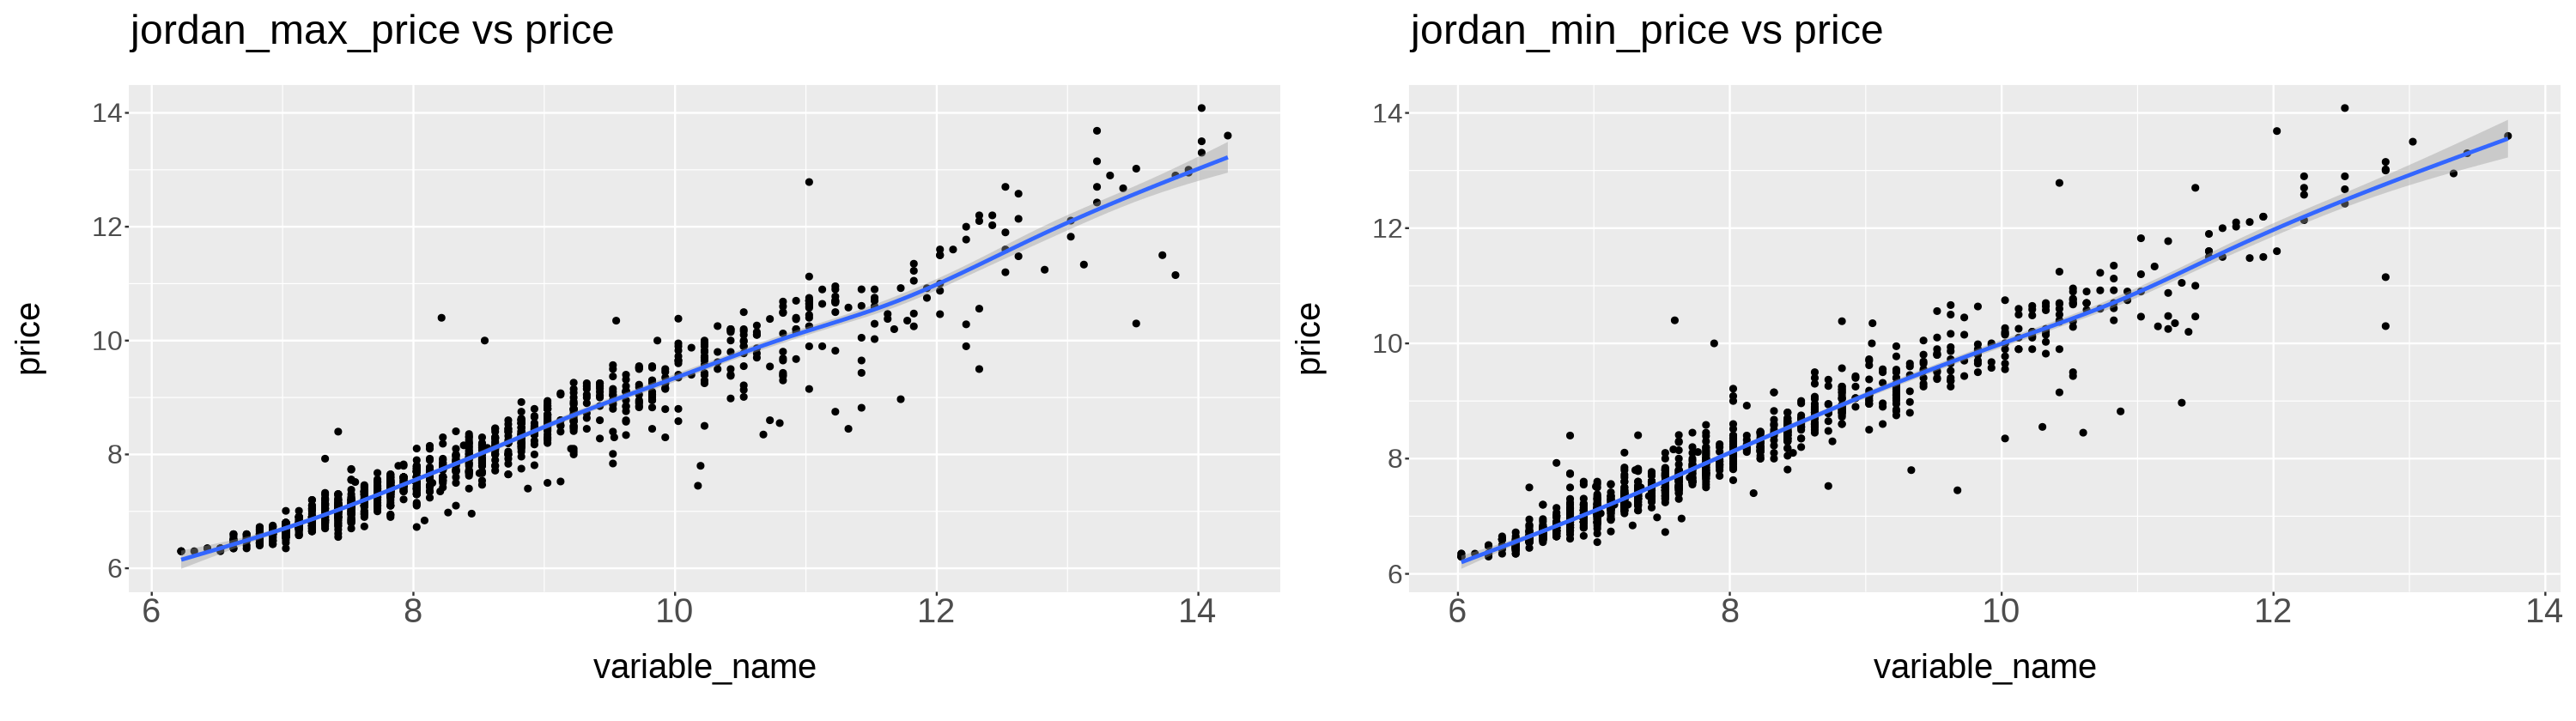

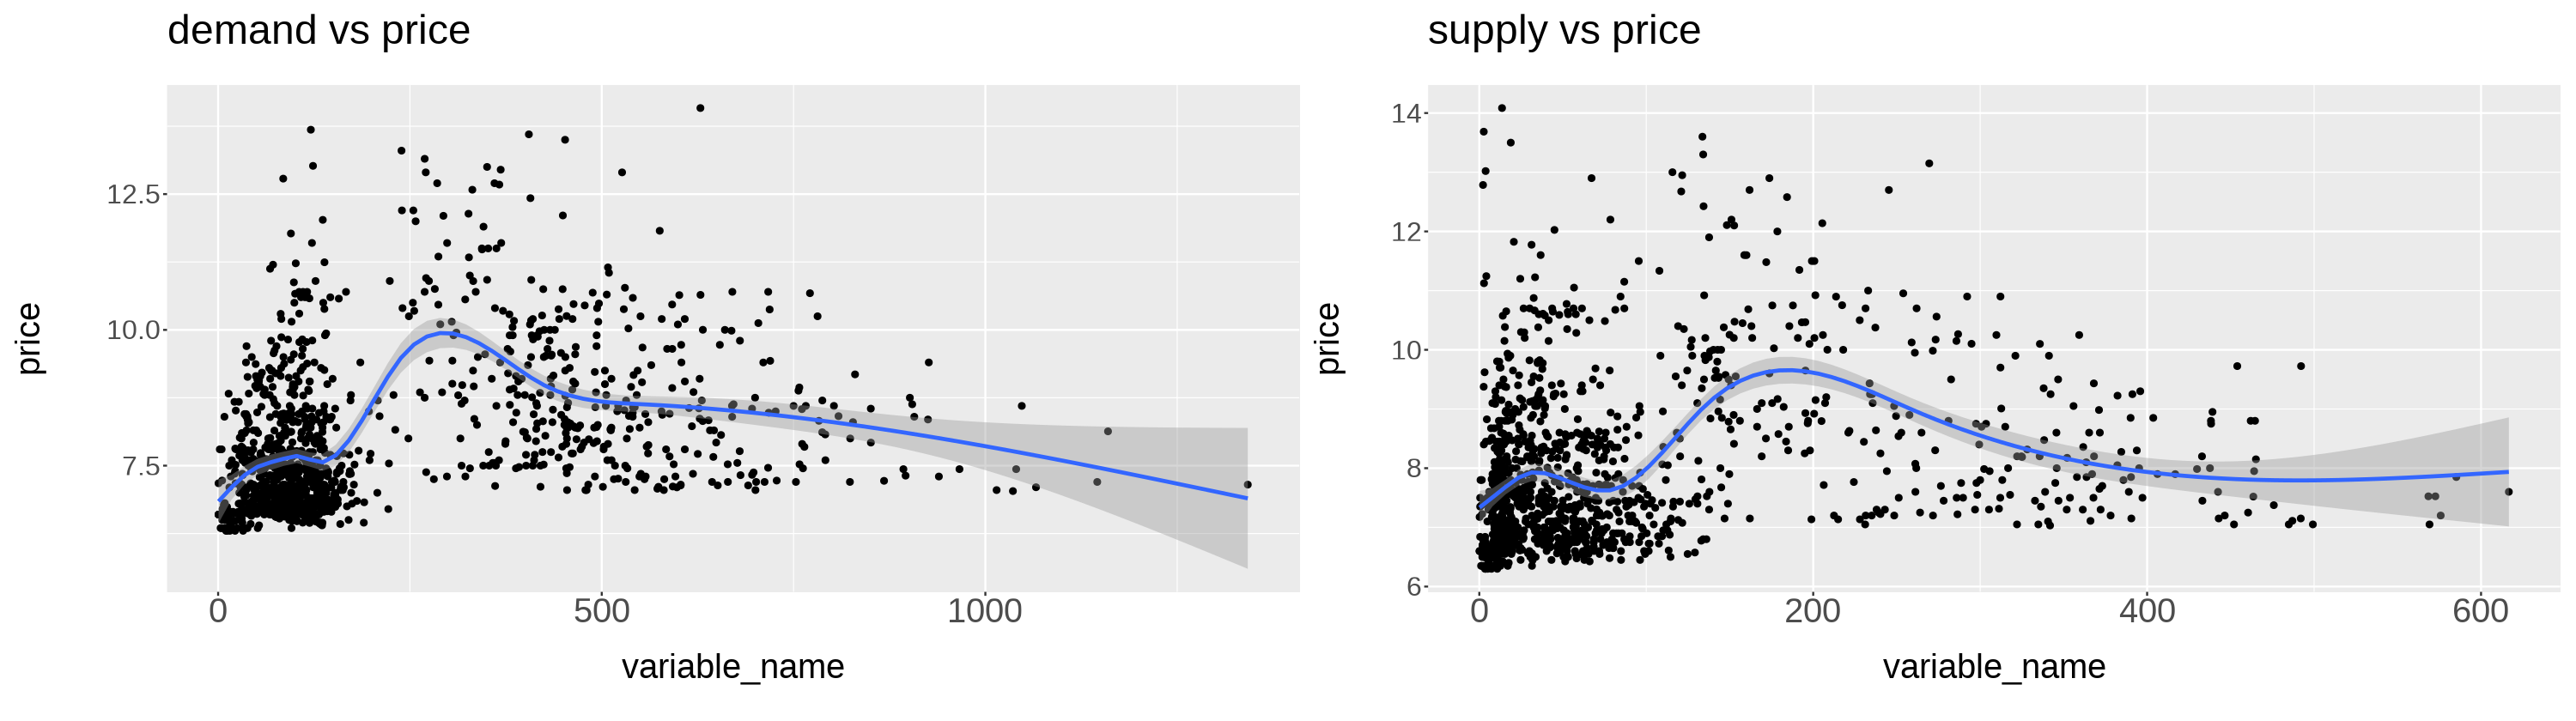

In [217]:
options(repr.plot.width=25, repr.plot.height=7);
Relation_between_Price_vs_others_vizualization(numerical_data$total_volume)+ggtitle("total_volume vs price")+
Relation_between_Price_vs_others_vizualization(numerical_data$brazil)+ggtitle("brazil vs price")+
Relation_between_Price_vs_others_vizualization(numerical_data$india)+ggtitle("india vs price")

Relation_between_Price_vs_others_vizualization(numerical_data$vietnam)+ggtitle("vietnam vs price")+
Relation_between_Price_vs_others_vizualization(numerical_data$indonesia)+ggtitle("indonesia vs price")+
Relation_between_Price_vs_others_vizualization(numerical_data$china)+ggtitle("china vs price")

Relation_between_Price_vs_others_vizualization(numerical_data$jordan_max_price)+ggtitle("jordan_max_price vs price")+
Relation_between_Price_vs_others_vizualization(numerical_data$jordan_min_price)+ggtitle("jordan_min_price vs price")

Relation_between_Price_vs_others_vizualization(numerical_data$demand)+ggtitle("demand vs price")+
Relation_between_Price_vs_others_vizualization(numerical_data$supply)+ggtitle("supply vs price")

> *We can see from the above charts that the relationship between the variables is not linear except when it comes to supply and demand variables)*

-----------------------------------------------

# *The correlation between The numerical variables :*

* *as the data is not normally distributed we will apply spearman methods*

In [17]:
cor(numerical_data,method = "spearman") 

,price,total_volume,brazil,india,vietnam,indonesia,china,jordan_max_price,jordan_min_price,demand,supply
price,1.00000000,-0.1122322,0.27821832,-0.0264910906,-0.35171917,0.364840766,0.06416761,0.9720656972,0.97143147,0.429827423,0.31630570
total_volume,-0.11223220,1.0000000,0.18552426,-0.3535011218,0.69642455,0.054228596,0.35014697,-0.1220329477,-0.09691870,0.112544084,0.28290567
brazil,0.27821832,0.1855243,1.00000000,-0.6312191828,-0.38133535,0.565690094,0.08647015,0.2423080947,0.25337312,0.029613444,0.02476916
india,-0.02649109,-0.3535011,-0.63121918,1.0000000000,0.06383747,-0.417250264,-0.29938190,0.0003487209,-0.01404507,-0.093437805,-0.17878980
vietnam,-0.35171917,0.6964246,-0.38133535,0.0638374685,1.00000000,-0.561675948,0.08602471,-0.3545444619,-0.32583633,0.105432236,0.23305240
indonesia,0.36484077,0.0542286,0.56569009,-0.4172502638,-0.56167595,1.000000000,0.29685559,0.3586799047,0.35099174,-0.001406679,0.01829601
china,0.06416761,0.3501470,0.08647015,-0.2993819043,0.08602471,0.296855591,1.00000000,0.0652780279,0.06983672,0.012370860,0.34396846
jordan_max_price,0.97206570,-0.1220329,0.24230809,0.0003487209,-0.35454446,0.358679905,0.06527803,1.0000000000,0.98115794,0.403713772,0.28977150
jordan_min_price,0.97143147,-0.0969187,0.25337312,-0.0140450682,-0.32583633,0.350991741,0.06983672,0.9811579419,1.00000000,0.434030488,0.32531027
demand,0.42982742,0.1125441,0.02961344,-0.0934378049,0.10543224,-0.001406679,0.01237086,0.4037137716,0.43403049,1.000000000,0.72243761


*C.2. Interential Anaysis*

*normality check :*<br>
*normality Test: - A formal statistical test for normality - The null hypothesis states that the data follows a normal distribution shape*

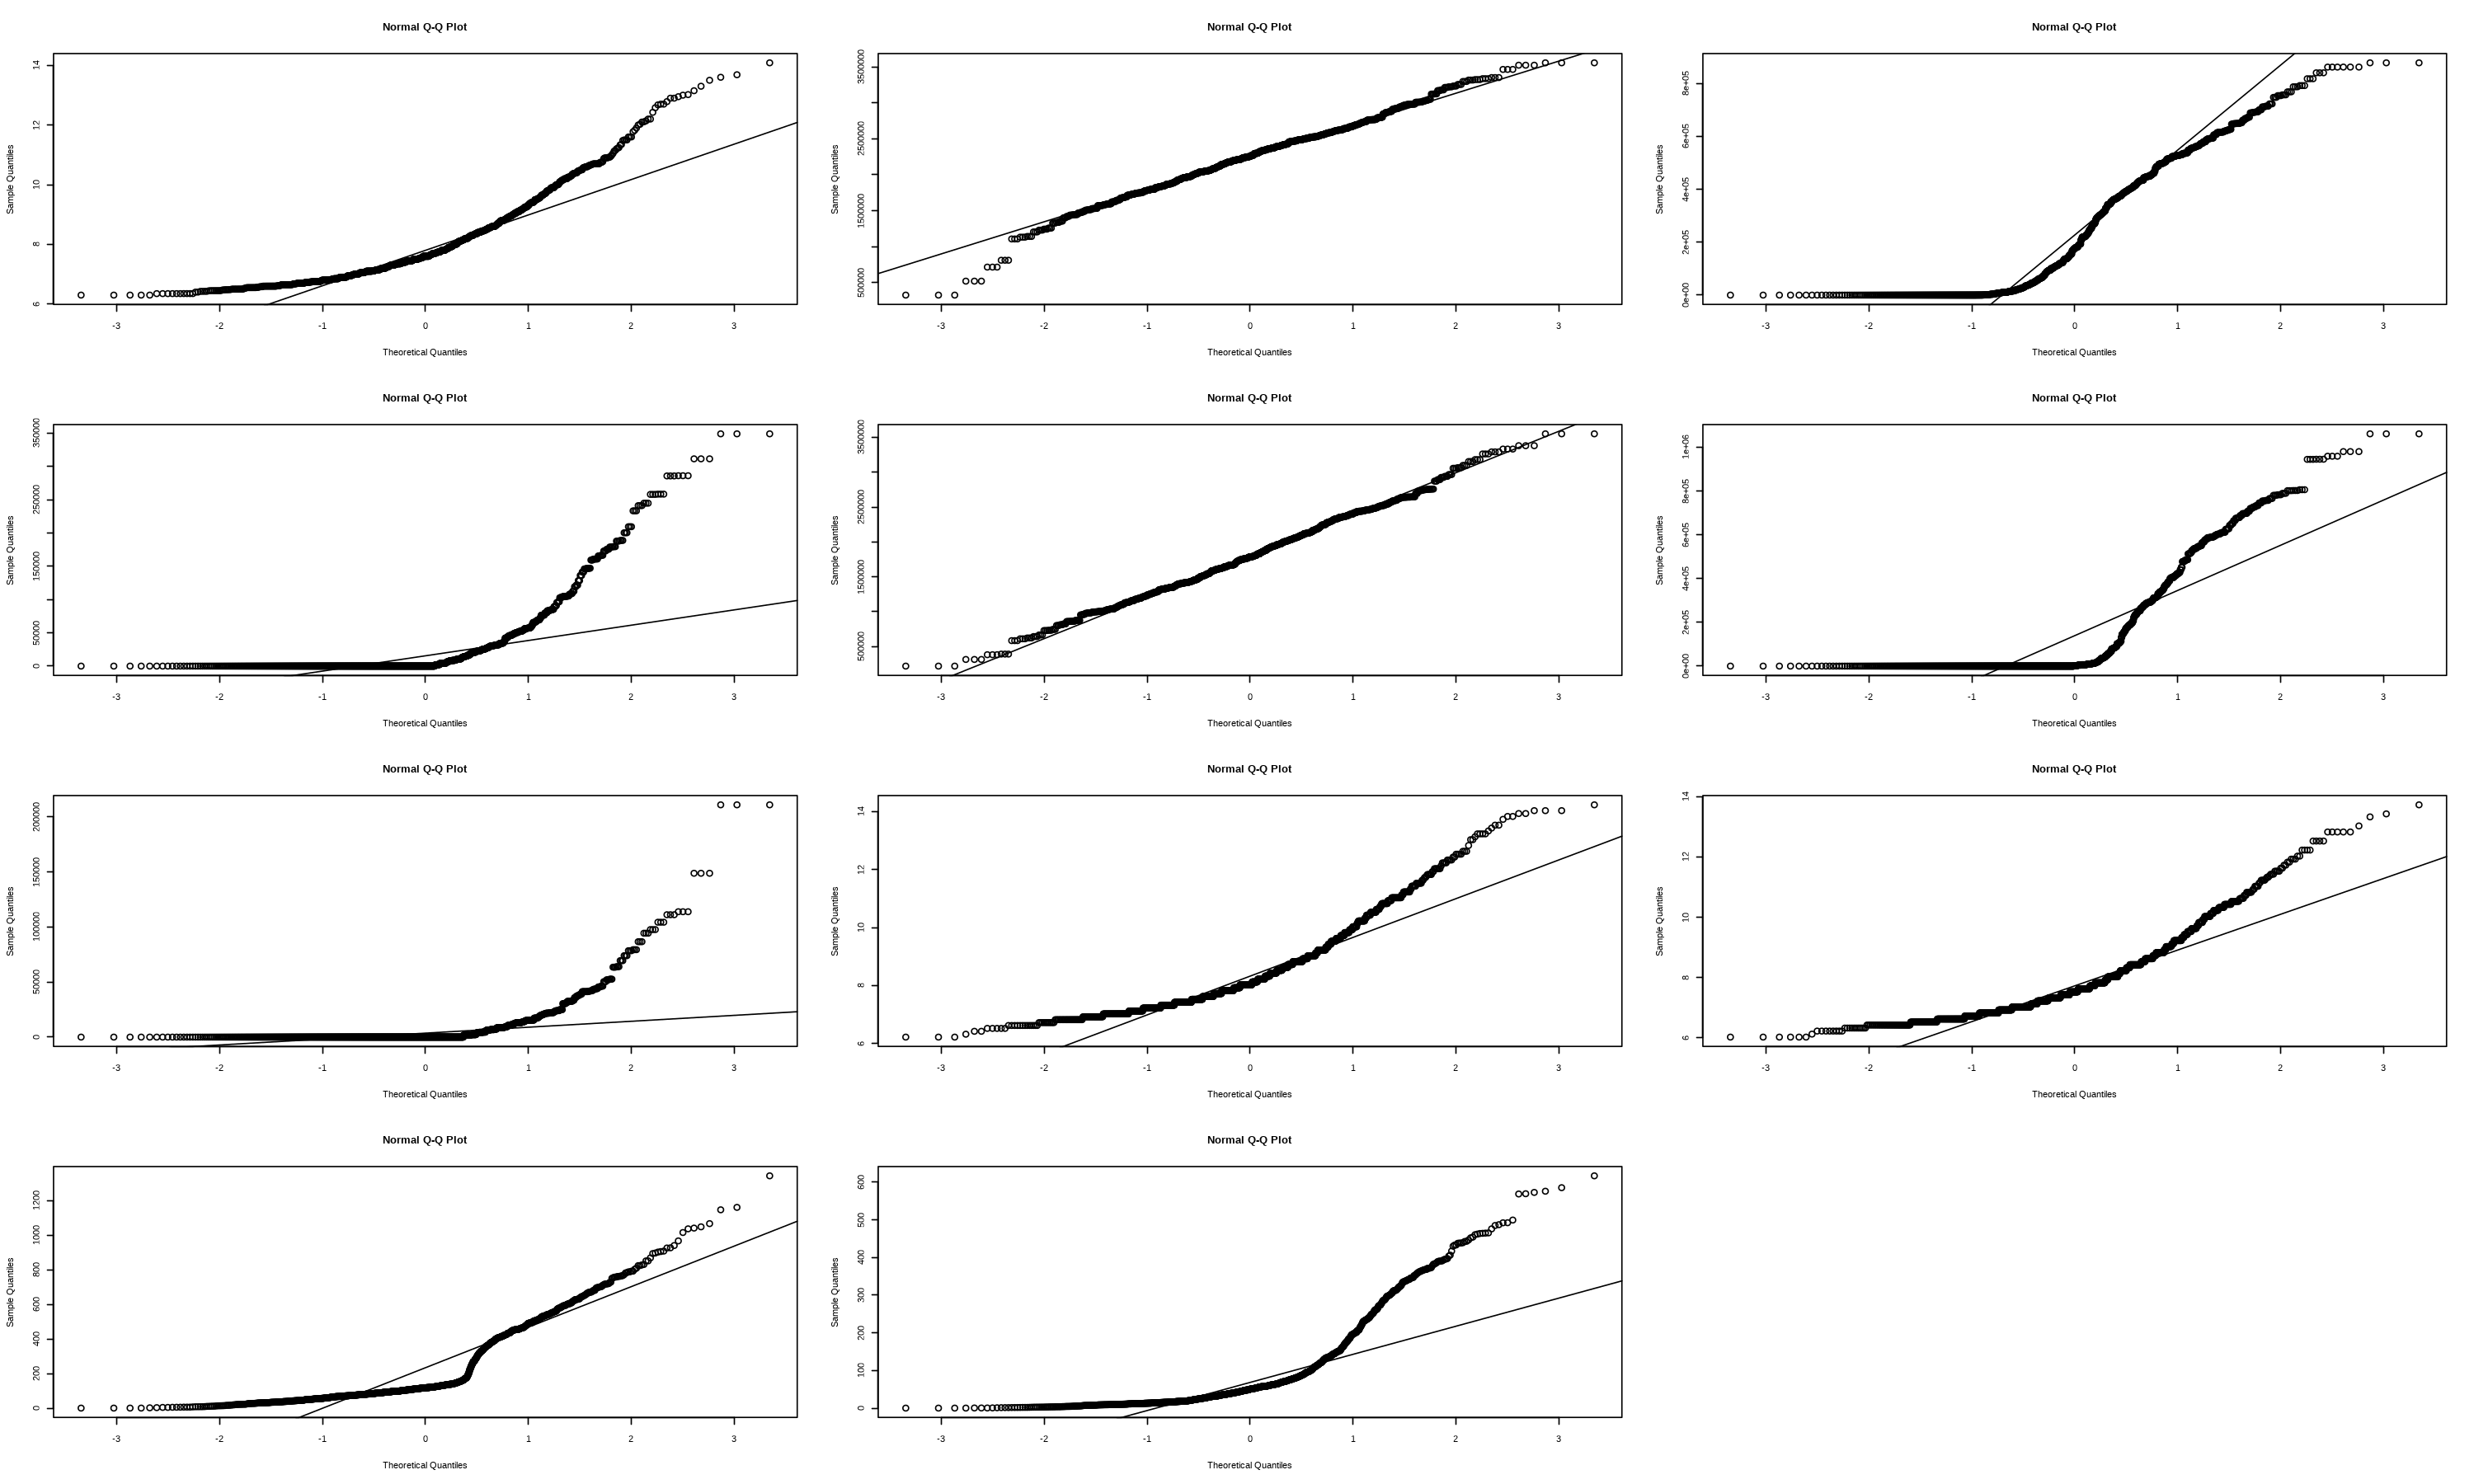

In [236]:
options(repr.plot.width=25, repr.plot.height=15);
par(mfrow = c(4, 3))
for (col in numerical_data) {
  qqnorm(col)
  qqline(col)
}
par(mfrow = c(1, 1))

In [237]:
df %>% select(price,total_volume,brazil,india,vietnam,indonesia,china)  %>%  normality()

vars,statistic,p_value,sample
<chr>,<dbl>,<dbl>,<dbl>
price,0.8771227,6.510843e-30,1215
total_volume,0.9904102,4.008798e-07,1215
brazil,0.8800461,1.288483e-29,1215
india,0.5834130,5.488199e-47,1215
vietnam,0.9962566,4.840132e-03,1215
indonesia,0.6933827,2.527380e-42,1215
china,0.4481965,1.738813e-51,1215


> *as the pvalue is less than 0.05 ---> we can reject the null hypothesis that states the data follows a normal distribution shape, and accept the alternative hypothesis*

---

# *E. inferential analysis*

* *as out target is to understand the price variable for each pepper_color we will only focus on these two variables*

## *E.1: Price by pepper_color*

* *E.1.1 : Price by number of doors-Basic description*

In [113]:
df %>% group_by(p_color) %>% summarise(
  count = n(),
  mean = mean(price),
  sd = sd(price),
  min = min(price),
  Q1 = quantile(price, 0.25),
  median = median(price),
  Q3 = quantile(price, 0.75),
  max = max(price)
) %>% kable()



|p_color | count|     mean|        sd|      min|       Q1|   median|       Q3|      max|
|:-------|-----:|--------:|---------:|--------:|--------:|--------:|--------:|--------:|
|green   |   405| 7.215042| 0.8224482| 6.299625| 6.699645| 6.900000| 7.539580| 12.78481|
|red     |   405| 7.882143| 1.1570314| 6.449990| 7.100440| 7.529990| 8.350220| 13.68538|
|yellow  |   405| 8.929220| 1.4515797| 7.031635| 7.799655| 8.600075| 9.899575| 14.08459|

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


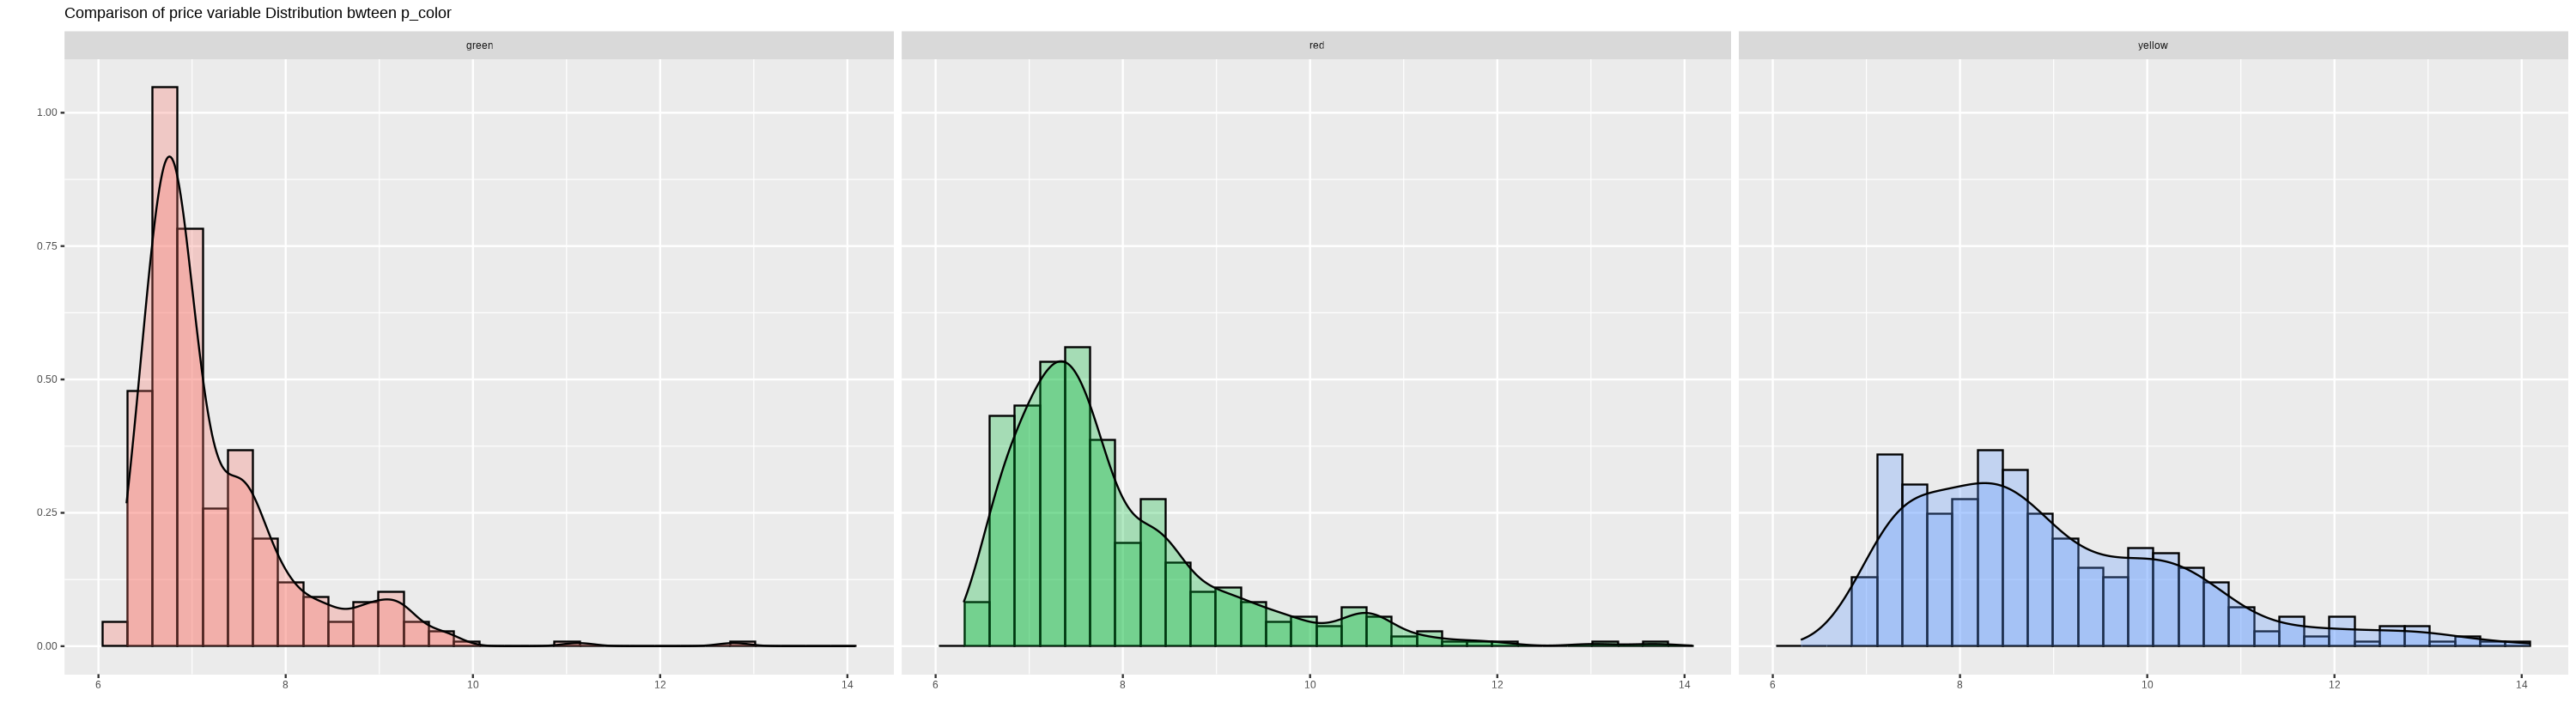

In [114]:
ggplot(df, aes(x = price,y=after_stat(density),fill=p_color)) + geom_histogram( color = 'black',alpha=.3) + labs(x="",y="",title="Comparison of price variable Distribution bwteen p_color ")+geom_density(alpha=.3)+facet_wrap(~p_color)+theme(legend.position = "none")

* *E.1.2 :Applying kruskal.test (for variables with more than two groups) to find out if there are significant differences in Price Distribution among the p_color groups :*

In [116]:
kruskal.test(price ~ p_color , data = df)


	Kruskal-Wallis rank sum test

data:  price by p_color
Kruskal-Wallis chi-squared = 403.28, df = 2, p-value < 2.2e-16


> *As the The p-value is less than 0.05 , we will reject the null hypothesis,indicating that there are significant differences in Price Distribution among the p_color groups.*


* *E.1.3 :Visualizing The Statistical test*

In [117]:
ggstatsplot_customized_theme<-theme(text = element_text(size = 20),
                               plot.subtitle = element_text(size = 20),
                               legend.title = element_text(size = 30),
                               legend.text = element_text(size = 20))

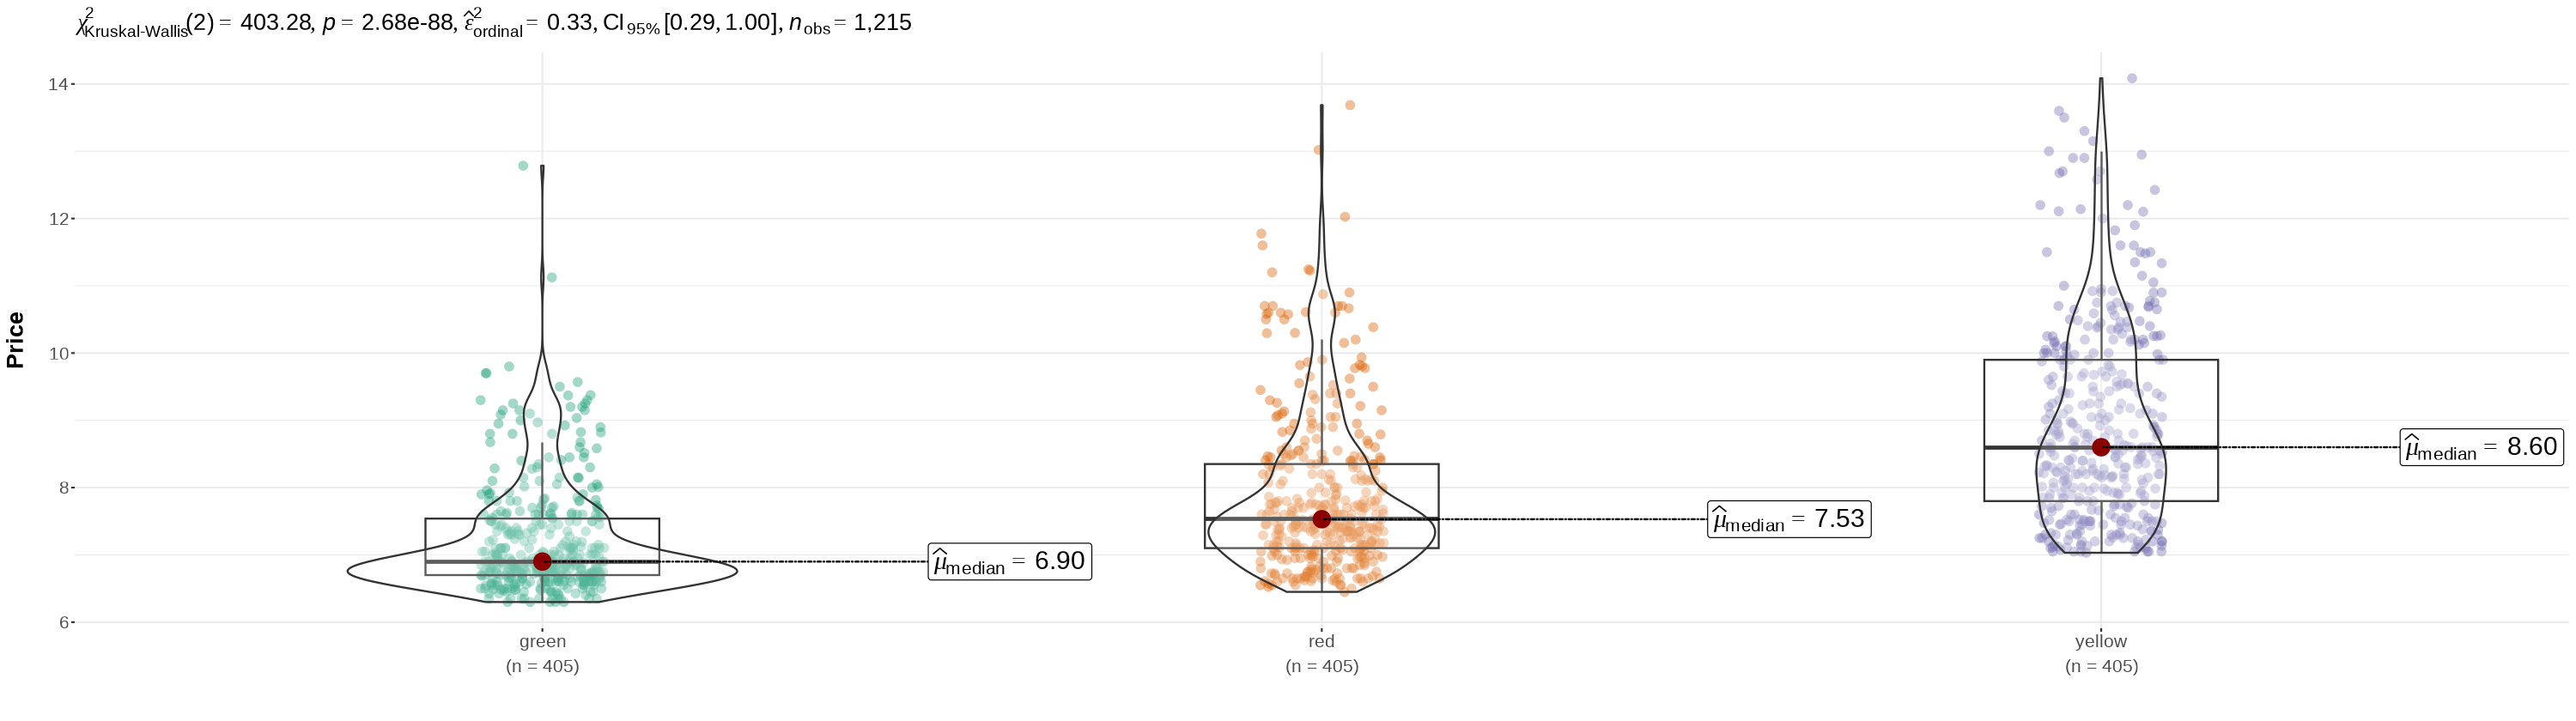

In [118]:
df %>% ggbetweenstats(x=p_color,y=price,type = "nonparamertic",conf.level = 0.95,pairwise.display = "none",
                      centrality.label.args = list(size = 8, nudge_x = 0.6,segment.linetype = 4,min.segment.length = 0),
                      ggsignif.args = list(textsize = 5, tip_length = 0.01, na.rm = TRUE),
                      p.adjust.method = "bonferroni")+
  labs(x="",y="Price")+
  ggstatsplot_customized_theme 

* *E.1.4: To find out this difference in details: we will apply pairwise.wilcox.test*

In [119]:
pairwise.wilcox.test(df$price, df$p_color, p.adjust.method = "bonferroni") 


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  df$price and df$p_color 

       green  red   
red    <2e-16 -     
yellow <2e-16 <2e-16

P value adjustment method: bonferroni 

> *As we can see there is significant difference in Price Distributions when we compare all groups with each other as the p-value adjusted is less than 0.05*

-----------------------------------------------



# *Final Conclusions:*

* *Bell Peppers of different colors (green, red, yellow) do significantly affect the price distribution in the data set.*


----------------------------------------------